In [2]:
import pandas as pd
dataset=pd.read_csv('tweets.csv',encoding='ISO-8859-1')
dataset.head(3)


,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False


In [3]:
def gen_freq(text):
    word_list=[]
    for tw_words in text.split():
        word_list.extend(tw_words)
    word_freq=pd.Series(word_list).value_counts()
    word_freq[:10]
    return word_freq

In [4]:
word_freq=gen_freq(dataset.text.str)
word_freq

RT                         11053
to                          7650
is                          5152
in                          4491
the                         4331
                           ...  
#News                          1
notes|                         1
https://t.co/ECl4oIzdHA        1
https://t.co/9MjFtLtCtR        1
https://t.co/hwgqjbqgvG        1
Length: 19601, dtype: int64

In [5]:
!pip install wordcloud

     -------------------------------------- 300.4/300.4 kB 9.4 MB/s eta 0:00:00


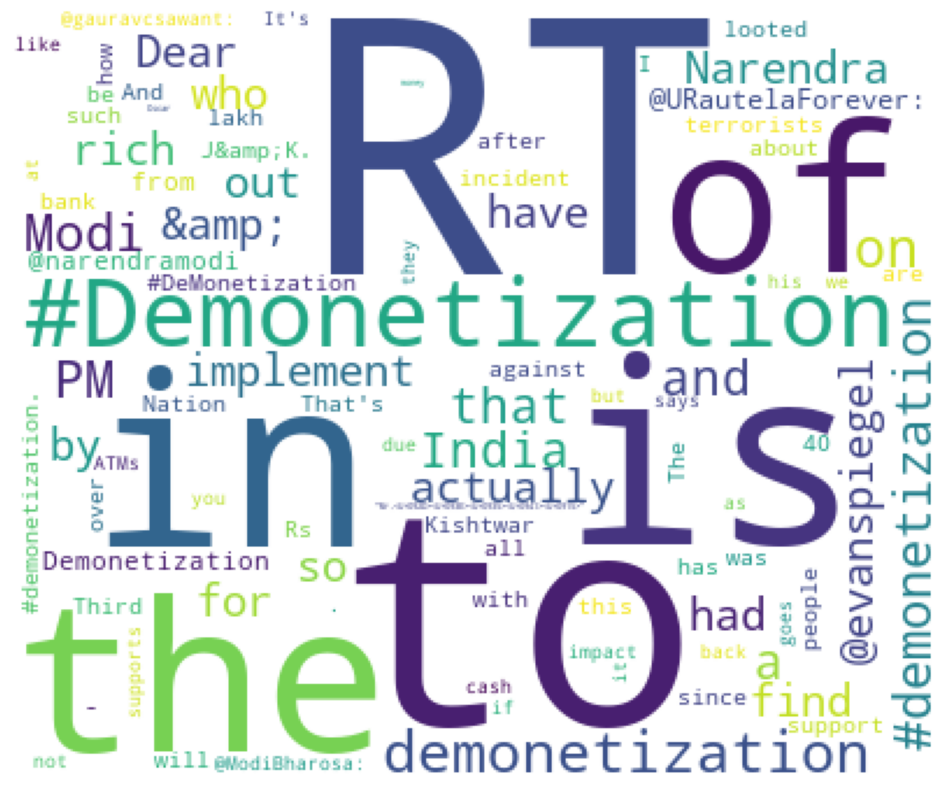

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wc=WordCloud(width=400,height=330,max_words=200,background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(12,18))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [8]:
import re
def clean_text(text):
    text=re.sub(r'RT','',text)
    text=re.sub(r'&amp;','',text)
    text=re.sub(r'[?!..;:,#@-]','',text)
    text=text.lower()
    text=re.sub(r'\d+','',text)
    text=re.sub(r'%','',text)
    return text
    
    

In [9]:
from wordcloud import STOPWORDS
print(STOPWORDS)

{"who's", 'theirs', 'we', "haven't", 'just', 'would', 'no', 'i', "let's", 'from', 'their', "they'll", "mustn't", 'when', 'these', 'such', 'there', 'is', 'those', 'has', 'should', 'myself', 'also', 'ourselves', 'here', 'did', 'some', 'as', 'could', "aren't", 'through', 'but', "wouldn't", "won't", 'or', 'he', 'our', 'have', 'whom', 'get', 'her', 'com', 'down', "that's", 'to', 'nor', 'does', 'do', 'themselves', 'before', "can't", 'they', 'www', "he'll", "you'll", 'him', 'shall', "shan't", "shouldn't", 'off', 'doing', 'only', "they'd", "i'd", "doesn't", 'who', "you're", 'else', 'are', 'however', 'few', "we'll", 'yourself', 'why', 'out', 'over', "here's", 'otherwise', 'which', "she'll", 'yourselves', 'until', 'up', 'after', 'be', 'them', 'for', "isn't", 'other', 'where', 'can', 'of', 'into', 'cannot', 'all', 'a', 'and', 'hence', "she's", 'the', 'with', 'my', "you've", 'having', 'above', "we've", 'am', "i'm", "i've", 'again', 'at', 'because', "wasn't", 'therefore', "why's", 'between', 'too',

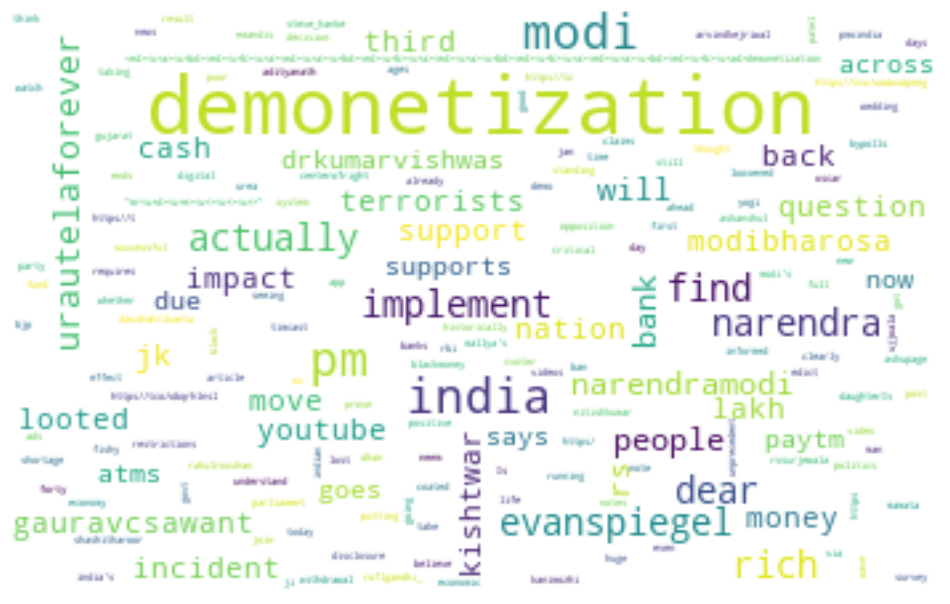

In [10]:
text=dataset.text.apply(lambda x: clean_text(x))
word_freq=gen_freq(text.str)
word_freq=word_freq.drop(labels=STOPWORDS,errors='ignore')
wc=WordCloud(width=350,height=220,max_words=500,
            background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(12,8))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

In [2]:
import pandas as pd
text=['Sara lives in a hut in the village.',
     'She has an apple tree in her backyard.',
     'The apples are red in colour.']
df=pd.DataFrame(text,columns=['Sentence'])
df

,Sentence
0,Sara lives in a hut in the village.
1,She has an apple tree in her backyard.
2,The apples are red in colour.


In [3]:
!pip install spacy


     -------------------------------------- 12.3/12.3 MB 679.4 kB/s eta 0:00:00
     ------------------------------------ 431.7/431.7 kB 380.0 kB/s eta 0:00:00
     ------------------------------------ 183.0/183.0 kB 846.7 kB/s eta 0:00:00
     ---------------------------------------- 50.3/50.3 kB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 2.3 MB/s eta 0:00:00
     -------------------------------------- 44.9/44.9 kB 444.5 kB/s eta 0:00:00
     -------------------------------------- 122.7/122.7 kB 2.4 MB/s eta 0:00:00
     -------------------------------------- 633.4/633.4 kB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 5.4/5.4 MB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 6.2/6.2 MB 2.2 MB/s eta 0:00:00
     -------------------------------------- 242.4/242.4 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 52

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqt5<5.13, which is not installed.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.


In [4]:
!python -m spacy download en_core_web_sm

     -------------------------------------- 12.8/12.8 MB 546.3 kB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [5]:
import spacy
nlp=spacy.load("en_core_web_sm")
token=[]
pos=[]
for sent in nlp.pipe(df['Sentence']):
    if sent.has_annotation('DEP'):
        token.append([word.text for word in sent])
        #add the pos tage for each token to the pos list
        pos.append([word.pos_ for word in sent])
token

[['Sara', 'lives', 'in', 'a', 'hut', 'in', 'the', 'village', '.'],
 ['She', 'has', 'an', 'apple', 'tree', 'in', 'her', 'backyard', '.'],
 ['The', 'apples', 'are', 'red', 'in', 'colour', '.']]

In [6]:
df['token']=token
df['pos']= pos

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
stop_words=set(stopwords.words('english'))
tokens=sent_tokenize(text)
for i in tokens:
    words=nltk.word_tokenize(i)
    words=[w for w in words if not w in stop_words]
    tags=nltk.pos_tag(words)
tags

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\Kannedari Nandini/nltk_data'
    - 'C:\\Users\\Kannedari Nandini\\anaconda3\\nltk_data'
    - 'C:\\Users\\Kannedari Nandini\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\Kannedari Nandini\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Kannedari Nandini\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************
